<a href="https://colab.research.google.com/github/anitahf/Clase---Aprendizaje-Automatico/blob/main/Taller_03_Agrupamiento_Jerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/03-Agrupamiento-Jerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento Jerarquico
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Ana Hidalgo &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.

Los paquetes necesarios son:

In [22]:
# Paquetes necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster

---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [3]:
from google.colab import files
uploaded = files.upload()


Saving dataset.csv to dataset.csv


In [3]:
data = pd.read_csv('dataset.csv')

# Por si viene con índice guardado
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

data.head()


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [23]:
# Mostrar información general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [24]:
# Mostrar una descripción estadística
data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [25]:
# Columnas numéricas
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
numeric_cols

Index(['popularity', 'duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [26]:
# Tomar una muestra pequeña
data_sample = data.sample(n=300, random_state=42)
data_sample.shape

(300, 20)

In [27]:
scaler = StandardScaler()
X = scaler.fit_transform(data_sample[numeric_cols])
X.shape

(300, 14)

---
## <font color='264CC7'> Dendograma </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Genera el dendograma de los datos.
<ul>
  <li>Usa diferentes métricas y funciones de enlace.</li>
  <li>Toma una distancia de corte.</li>
  <li>De manera intutiva, ¿por qué tomaste la métrica y la distancia de corte?</li>
</ul>
</div>

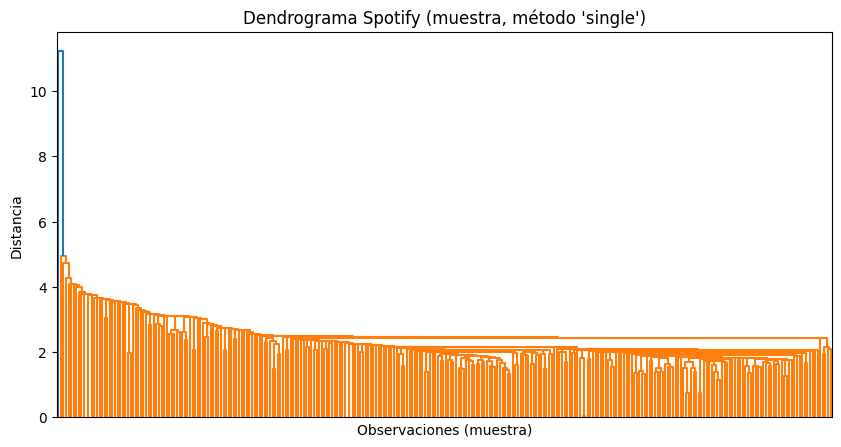

In [28]:
# Clustering jerárquico con método 'single'
Z = linkage(X, method='single')

plt.figure(figsize=(10, 5))
dendrogram(Z, no_labels=True)
plt.title("Dendrograma Spotify (muestra, método 'single')")
plt.xlabel("Observaciones (muestra)")
plt.ylabel("Distancia")
plt.show()


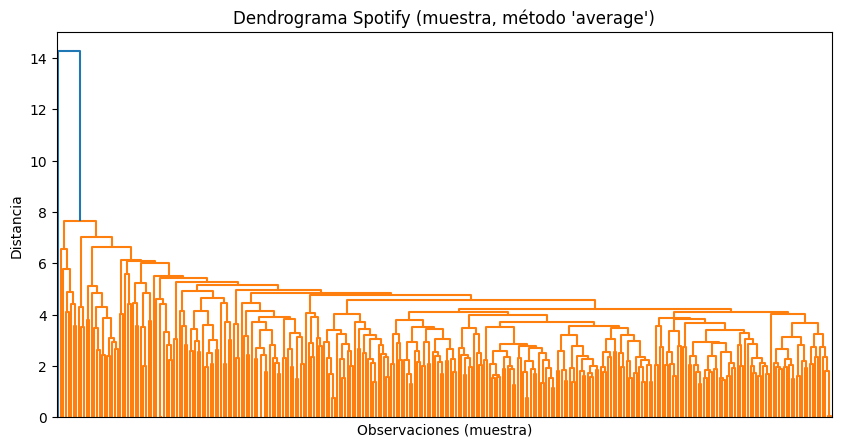

In [29]:
# Clustering jerárquico con método 'average'
Z = linkage(X, method='average')

plt.figure(figsize=(10, 5))
dendrogram(Z, no_labels=True)
plt.title("Dendrograma Spotify (muestra, método 'average')")
plt.xlabel("Observaciones (muestra)")
plt.ylabel("Distancia")
plt.show()


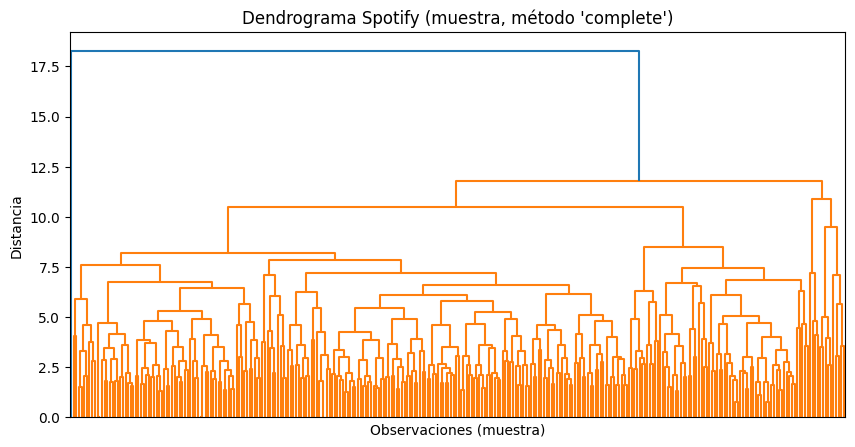

In [30]:
# Clustering jerárquico con método 'complete'
Z = linkage(X, method='complete')

plt.figure(figsize=(10, 5))
dendrogram(Z, no_labels=True)
plt.title("Dendrograma Spotify (muestra, método 'complete')")
plt.xlabel("Observaciones (muestra)")
plt.ylabel("Distancia")
plt.show()


Decidí usar el método complete para el agrupamiento porque ofrece una separación más estable entre los clusters. A diferencia del método single, que tiende a unir puntos muy cercanos y generar cadenas alargadas, complete se enfoca en maximizar la distancia entre los elementos más lejanos de cada grupo. Esto hace que los clusters resultantes sean más compactos y mejor definidos.

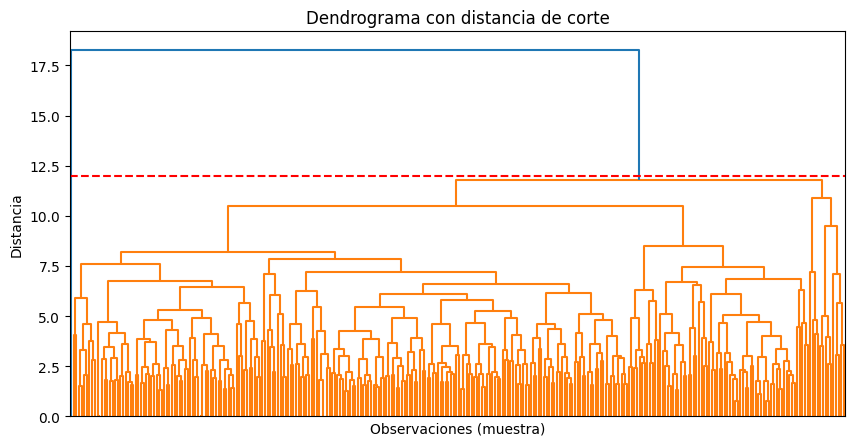

In [31]:
distancia_corte = 12
plt.figure(figsize=(10, 5))
dendrogram(Z, no_labels=True)
plt.axhline(y=distancia_corte, color='red', linestyle='--')
plt.title("Dendrograma con distancia de corte")
plt.xlabel("Observaciones (muestra)")
plt.ylabel("Distancia")
plt.show()


---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

In [32]:
# Asignar etiquetas de cluster
clusters = fcluster(Z, t=distancia_corte, criterion='distance')

# Guardar en el DataFrame d
data_sample = data_sample.copy()
data_sample['Cluster'] = clusters

data_sample.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,Cluster
113186,6KwkVtXm8OUp2XffN5k7lY,Hillsong Worship,No Other Name,No Other Name,50,440247,False,0.369,0.598,7,...,1,0.0304,0.00511,0.000000,0.176,0.0466,148.014,4,world-music,1
42819,2dp5I5MJ8bQQHDoFaNRFtX,Internal Rot,Grieving Birth,Failed Organum,11,93933,False,0.171,0.997,7,...,1,0.1180,0.00521,0.801000,0.420,0.0294,122.223,4,grindcore,1
59311,5avw06usmFkFrPjX8NxC40,Zhoobin Askarieh;Ali Sasha,Noise A Noise 20.4-1,"Save the Trees, Pt. 1",0,213578,False,0.173,0.803,9,...,0,0.1440,0.61300,0.001910,0.195,0.0887,75.564,3,iranian,1
91368,75hT0hvlESnDJstem0JgyR,Bryan Adams,All I Want For Christmas Is You,Merry Christmas,0,151387,False,0.683,0.511,6,...,1,0.0279,0.40600,0.000197,0.111,0.5980,109.991,3,rock,1
61000,4bY2oZGA5Br3pTE1Jd1IfY,Nogizaka46,バレッタ TypeD,月の大きさ,57,236293,False,0.555,0.941,9,...,0,0.0481,0.48400,0.000000,0.266,0.8130,92.487,4,j-idol,1


In [33]:
data_sample['Cluster'].value_counts().sort_index()

,count
Cluster,
1,299
2,1


In [34]:
#Media de cada grupo
data_sample.groupby('Cluster')[numeric_cols].mean()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
Cluster,,,,,,,,,,,,,,
1,32.996656,224123.254181,0.580692,0.651912,5.411371,-7.782803,0.61204,0.098083,0.314949,0.131428,0.22316,0.488551,126.054508,3.953177
2,54.000000,500166.000000,0.000000,0.000020,6.000000,-25.556000,1.00000,0.000000,0.145000,0.213000,0.11400,0.000000,0.000000,0.000000


In [35]:
#Minimo y maximo de cada grupo
data_sample.groupby('Cluster')[numeric_cols].agg(['min', 'max'])

popularity     duration_ms         danceability          energy  \
               min max         min     max          min    max      min   
Cluster                                                                   
1                0  85       42440  797375        0.148  0.914  0.01890   
2               54  54      500166  500166        0.000  0.000  0.00002   

                 key      ... instrumentalness        liveness        valence  \
             max min max  ...              min    max      min    max     min   
Cluster                   ...                                                   
1        0.99900   0  11  ...            0.000  0.965   0.0308  0.988  0.0294   
2        0.00002   6   6  ...            0.213  0.213   0.1140  0.114  0.0000   

                tempo          time_signature      
           max    min      max            min max  
Cluster                                            
1        0.992  65.77  198.467              3   5  
2        0.000   0.00    0.000              0   0  

[2 rows x 28 columns]

In [36]:
for c in sorted(data_sample['Cluster'].unique()):
    print(f"\nCluster {c} - cantidad de canciones:", data_sample[data_sample['Cluster'] == c].shape[0])
    display(data_sample[data_sample['Cluster'] == c][['track_name', 'artists', 'track_genre', 'Cluster']].head(5))


Cluster 1 - cantidad de canciones: 299


,track_name,artists,track_genre,Cluster
113186,No Other Name,Hillsong Worship,world-music,1
42819,Failed Organum,Internal Rot,grindcore,1
59311,"Save the Trees, Pt. 1",Zhoobin Askarieh;Ali Sasha,iranian,1
91368,Merry Christmas,Bryan Adams,rock,1
61000,月の大きさ,Nogizaka46,j-idol,1



Cluster 2 - cantidad de canciones: 1


,track_name,artists,track_genre,Cluster
101043,Box Fan Long Loop For Sleep,Fan Sounds,sleep,2


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

Después del agrupamiento jerárquico, la muestra terminó dividida en dos grupos:

- Cluster 1:
Es el grupo más grande. Reúne casi todas las canciones de la muestra. Tienen valores bastante normales por decirlo asi en energía, tempo, sentimiwnto y más características. Son canciones típicas dentro de géneros variados (pop, rock, j-pop, world music, etc.).
Nombre sugerido: Música tipica.

- Cluster 2:
Este grupo contiene solo una canción, que resulta ser un audio ambiental para dormir. Sus características numéricas son extremas: energía y danceability casi en cero, loudness muy bajo y tempo mínimo.
Nombre sugerido: Musica Tranqulizante.

---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

Varianza explicada por PC1 y PC2: 31.67%


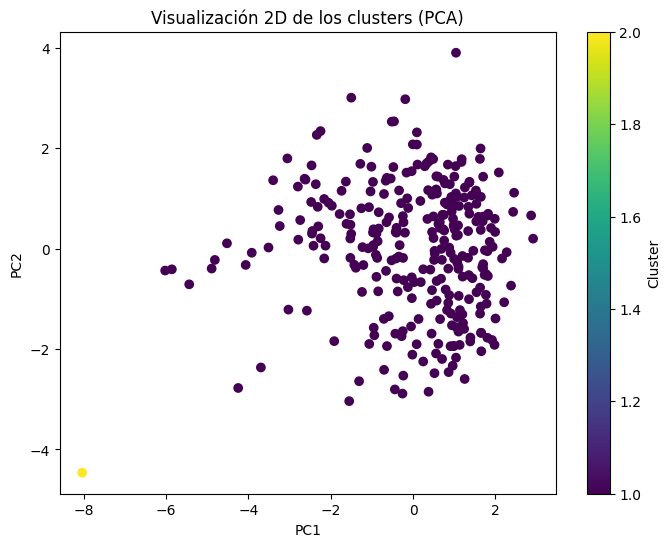

In [37]:
# Aplicar PCA a la muestra escalada
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Varianza explicada
var_exp = pca.explained_variance_ratio_ * 100
print(f"Varianza explicada por PC1 y PC2: {var_exp.sum():.2f}%")

# Visualización
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')

plt.title("Visualización 2D de los clusters (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.colorbar(scatter, label="Cluster")
plt.show()


¿Qué tan buenos me parecen los grupos?

En el gráfico 2D casi todo queda junto en una sola nube, y solo hay un punto que se va por su cuenta. O sea, los grupos no se ven muy separados porque básicamente toda la muestra cayó en el mismo cluster. Entonces, visualmente no se distingue mucho la diferencia entre ellos.

¿La varianza explicada afecta la visualización?

Sí, un poco.
Las dos primeras componentes solo explican alrededor del 31%, así que el gráfico no muestra toda la información real del dataset. Por eso también es normal que los clusters no se separen bien en solo dos dimensiones.

---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

In [38]:
# Silueta
silhouette = silhouette_score(X, clusters)
print(f"Puntaje de silueta: {silhouette:.4f}")

Puntaje de silueta: 0.6466


El valor de la silueta quedó en 0.65 aprox., lo cual es un puntaje relativamente bueno. Esto significa que, al menos en la muestra que usamos, las canciones están bastante bien separadas según los grupos que se formaron. A pesar de que un cluster tiene solo una canción, la métrica salió positiva y relativamente alta, lo que indica que los puntos dentro de cada grupo son parecidos entre sí y diferentes del otro cluster.

---
## <font color='264CC7'> Iteraciones </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza el proceso de agrupamiento jerárquico con diferentes parámetros, analiza la métrica de la silueta de cada uno e indica cuál es el mejor.
</div>

In [41]:
metodos = ['single', 'complete', 'average', 'ward']
resultados = {}

for m in metodos:
    # 1. Clustering jerárquico con cada método
    Z = linkage(X, method=m)

    # 2. Forzar a que se formen exactamente 2 clusters
    clusters_m = fcluster(Z, t=2, criterion='maxclust')

    # 3. La silueta solo tiene sentido si hay al menos 2 etiquetas distintas
    if len(np.unique(clusters_m)) > 1:
        sil = silhouette_score(X, clusters_m)
        resultados[m] = sil
        print(f"Método: {m:8s} → Silueta: {sil:.4f}")
    else:
        print(f"Método: {m:8s} → solo formó 1 cluster (no se puede calcular silueta)")

resultados


Método: single   → Silueta: 0.6466
Método: complete → Silueta: 0.6466
Método: average  → Silueta: 0.6466
Método: ward     → Silueta: 0.0847


{'single': np.float64(0.646625670314952),
 'complete': np.float64(0.646625670314952),
 'average': np.float64(0.646625670314952),
 'ward': np.float64(0.08472457270218321)}

El clustering lo probé con varios métodos de enlace. Los métodos single, complete y average dieron prácticamente la misma silueta ≈0.65, que es un valor relativamente bueno. En cambio, el método ward obtuvo una silueta mucho más baja ≈0.08, así que en este caso no funciona tan bien.
